In [41]:
%matplotlib inline

from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
import numpy as np
import nltk.stem
import sklearn.datasets
import nltk.corpus

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/florianherrengt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
english_stemmer = nltk.stem.SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

In [4]:
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt')

In [19]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1)

(array([   0.,    1.,    8.,    8.,   16.,   13.,   17.,   16.,   16.,
          13.,   20.,   16.,   28.,   47.,   58.,   60.,   76.,   99.,
         140.,  120.,  144.,  116.,  148.,  147.,  144.,  163.,  124.,
         103.,   86.,   85.,   63.,   38.,   37.,   18.,   13.,    8.,
           5.,    8.,    5.,    3.,    2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 41 Patch objects>)

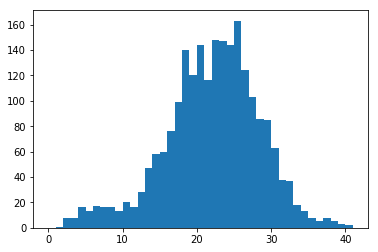

In [20]:
topics = [model[c] for c in corpus]
plt.hist([len(t) for t in topics], np.arange(42))

In [21]:
topics[0]

[(0, 0.029788153201794943),
 (3, 0.010619218497845152),
 (6, 0.017498571934117722),
 (11, 0.014626287689018807),
 (13, 0.011900220849690684),
 (14, 0.032619598603226413),
 (16, 0.010473744521946717),
 (23, 0.021563595191771767),
 (45, 0.043500346461482112),
 (54, 0.012169536059575941),
 (55, 0.019219037545592021),
 (60, 0.064141291168070061),
 (62, 0.029587939682106355),
 (80, 0.023465143213130639),
 (86, 0.019424890233443817),
 (91, 0.095157063048934121),
 (95, 0.011266931529297416)]

In [36]:
counts = np.zeros(100)
for doc_top in topics:
    for ti,_ in doc_top:
        counts[ti] += 1
        
for doc_top in topics:
    for ti,_ in doc_top:
        counts[ti] += 1
words = model.show_topic(counts.argmax(), 64)
print(words)

[('percent', 0.0067253531800070005), ('i', 0.0058496588447919818), ('new', 0.0057331902962852559), ('year', 0.0056369044877359279), ('retailers', 0.0052526699896986691), ('billion', 0.0048877804673529189), ('et', 0.0041738091295932317), ('tenor', 0.0040220428071789781), ('million', 0.0037673260333151693), ('first', 0.0036064562899469125), ('last', 0.0034725537577940421), ('president', 0.0034288501622891116), ('people', 0.0032478921154318312), ('states', 0.0029152252164932162), ('united', 0.002898403361951745), ('american', 0.0027928813924270744), ('years', 0.0026273367901866363), ('sales', 0.0026096247621150144), ('government', 0.002579610276084581), ('two', 0.0024847240307765187), ('officials', 0.0024260101653325364), ('porter', 0.0022081166263265822), ('home', 0.0021322438072044186), ('state', 0.0020911576499368571), ('told', 0.0020177679275838437), ('going', 0.0020069241653270136), ('national', 0.0019951963723827595), ('speeding', 0.001853126798982265), ('time', 0.001851570503061206

In [44]:
class DirectText(corpora.textcorpus.TextCorpus):
    def get_texts(self):
        return self.input
    def __len__(self):
        return len(self.input)

In [48]:
corpora.Dictionary(['a'])

TypeError: doc2bow expects an array of unicode tokens on input, not a single string